# Here the goal is look at Ca2+ signal in PhREM versus TonREM

In [1]:
import quantities as pq
import numpy as np
import neo
import json
from pathlib import Path
import xarray as xr
import pandas as pd
import scipy
from scipy import interpolate
from scipy import fftpack
from scipy import signal
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, Cursor
%matplotlib widget

from ephyviewer import mkQApp, MainViewer, TraceViewer

#from minian.utilities import (
#    TaskAnnotation,
#    get_optimal_chk,
#    load_videos,
#    open_minian,
#    save_minian,
#)

In [2]:
folder_base = Path('/Users/ahay/Documents/DATA/OPCA/20211014_OPCA_031TR_3263BR_TRstimON/')

filenameE = folder_base / f'allTR.npy'
All = np.load(filenameE)




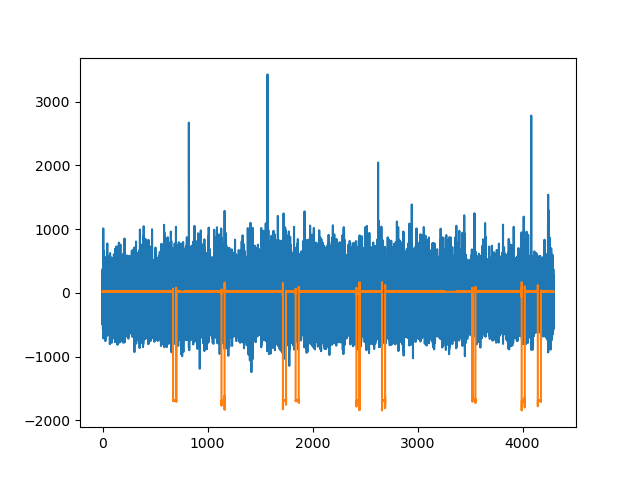

: 

In [68]:
ThetaCA1l = All[:,9]-All[:,10]
TTL = All[:,11]
fs = 1000
times = np.arange(0, ThetaCA1l.size/fs, 1./fs)

plt.close()
plt.plot(times,ThetaCA1l)
plt.plot(times,TTL/10)
plt.show()

In [4]:
#GoodChannels = np.stack((EMG, BLAl, BLAr, PFCl, CA1l, CA1r, TTL), axis = 1)
ThetaCA1l = All[:,4]-All[:,3]


# Parameter and computation of CWT
w = 10.
freq = np.linspace(5, 10, 10)
widths = w*fs / (2*freq*np.pi)
ThetaCWT = signal.cwt(ThetaCA1l, signal.morlet2, widths, w=w)

# Projection calculation
absThetaCWT = np.absolute(ThetaCWT)
from scipy import stats

proj_ThetaCWT = np.max(absThetaCWT, axis = 0)/8
sdproj_ThetaCWT = np.std(proj_ThetaCWT)
meanproj_ThetaCWT = np.mean(absThetaCWT, axis = 0)/3
maxFproj_ThetaCWT = np.argmax(absThetaCWT, axis = 0)/2+5

numpnts = ThetaCA1l.size
ThetaStatus = np.zeros(numpnts)
#for ind in range(numpnts):
#    if proj_ThetaCWT[ind]>(meanproj_ThetaCWT+1.4*sdproj_ThetaCWT):
#        ThetaStatus[ind] = 1






In [9]:
times = times[4000:4900]
absThetaCWT = absThetaCWT[4000:4900]

plt.close()
#sns.heatmap(absThetaCWT)
#plt.plot(times, proj_ThetaCWT*15)
#plt.plot(meanproj_ThetaCWT)
#plt.plot(maxFproj_ThetaCWT)
plt.show()

In [5]:
REM1CA1l = All[160000:260000,4]
x = All[160000:260000,4]

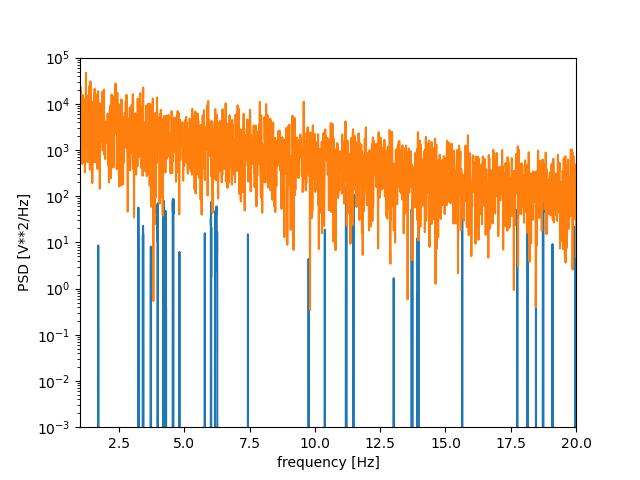

In [6]:
f, Pxx_den = signal.periodogram(REM1CA1l, fs)

plt.semilogy(f, Pxx_den)
plt.ylim([1e-3, 1e5])
plt.xlim([1, 20])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

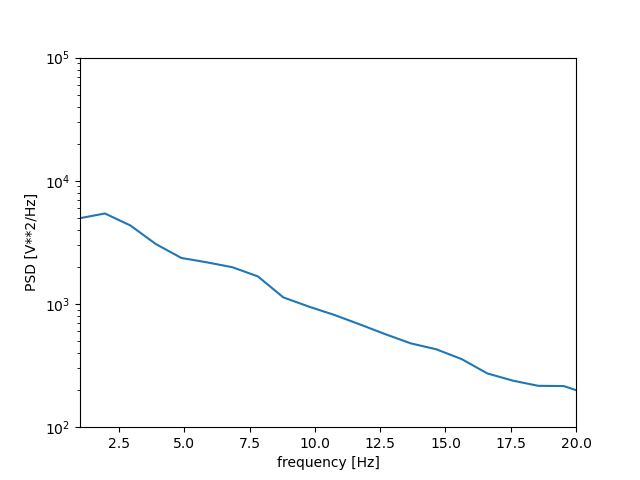

In [7]:
f, Pxx_den = signal.welch(x, fs, nperseg=1024)
plt.close()
plt.semilogy(f, Pxx_den)
plt.xlim([1, 20])
plt.ylim([1e2, 1e5])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()


In [6]:
BRremNL = All[840000:900000,]
BRremNL2 = All[1653000:1668000,]
BRremNL = np.concatenate([BRremNL, BRremNL2])
BRremNL2 = All[1860000:1865000,]
BRremNL = np.concatenate([BRremNL, BRremNL2])
BRremNL2 = All[1900000:1930000,]
BRremNL = np.concatenate([BRremNL, BRremNL2])
BRremNL2 = All[1970000:2000000,]
BRremNL = np.concatenate([BRremNL, BRremNL2])
BRremNL2 = All[3000000:3035000,]
BRremNL = np.concatenate([BRremNL, BRremNL2])
BRremNL2 = All[3070000:3150000,]
BRremNL = np.concatenate([BRremNL, BRremNL2])
BRremNL2 = All[4890000:4905000,]
BRremNL = np.concatenate([BRremNL, BRremNL2])
BRremNL2 = All[4940000:4960000,]
BRremNL = np.concatenate([BRremNL, BRremNL2])
BRremNL2 = All[5400000:5435000,]
BRremNL = np.concatenate([BRremNL, BRremNL2])

BRremNL.shape

(325000, 12)

In [3]:
TRremNL = All[2402000:2412000,]
TRremNL2 = All[2643000:2661000,]
TRremNL = np.concatenate([TRremNL, TRremNL2])
TRremNL2 = All[2692000:2720000,]
TRremNL = np.concatenate([TRremNL, TRremNL2])
TRremNL2 = All[3504000:3522000,]
TRremNL = np.concatenate([TRremNL, TRremNL2])
TRremNL2 = All[3552000:3571000,]
TRremNL = np.concatenate([TRremNL, TRremNL2])
TRremNL.shape

(93000, 12)

In [4]:
TRremL = All[1858000:1868000,]
TRremL2 = All[2418000:2448000,]
TRremL = np.concatenate([TRremL, TRremL2])
TRremL2 = All[2662000:2691000,]
TRremL = np.concatenate([TRremL, TRremL2])
TRremL2 = All[3523000:3551000,]
TRremL = np.concatenate([TRremL, TRremL2])
TRremL.shape

(97000, 12)

In [7]:
BRremL = All[912000:924000,]
BRremL2 = All[1670000:1695000,]
BRremL = np.concatenate([BRremL, BRremL2])
BRremL2 = All[1870000:1895000,]
BRremL = np.concatenate([BRremL, BRremL2])
BRremL2 = All[1940000:1960000,]
BRremL = np.concatenate([BRremL, BRremL2])
BRremL2 = All[3040000:3065000,]
BRremL = np.concatenate([BRremL, BRremL2])
BRremL2 = All[3155000:3180000,]
BRremL = np.concatenate([BRremL, BRremL2])
BRremL2 = All[4860000:4885000,]
BRremL = np.concatenate([BRremL, BRremL2])
BRremL2 = All[4910000:4935000,]
BRremL = np.concatenate([BRremL, BRremL2])
BRremL2 = All[5370000:5395000,]
BRremL = np.concatenate([BRremL, BRremL2])
BRremL2 = All[5445000:5470000,]
BRremL = np.concatenate([BRremL, BRremL2])

BRremL.shape

(232000, 12)

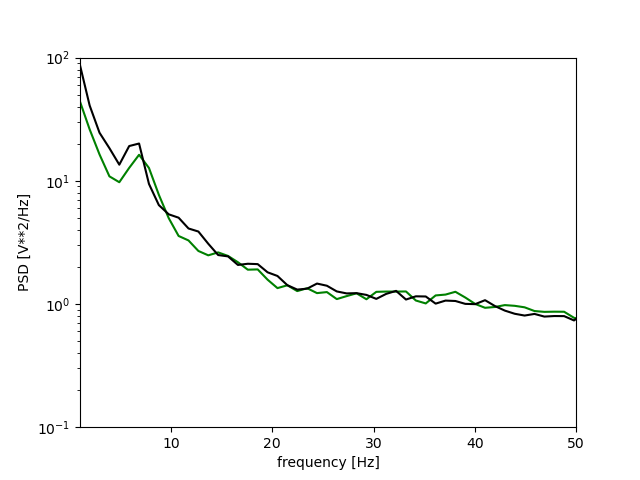

In [25]:
fs = 1000
BRremLCA1 = TRremL[:,3]-TRremL[:,4]
f, Pxx_den = signal.welch(BRremLCA1, fs, nperseg=1024)
BRremNLCA1 = TRremNL[:,3]-TRremNL[:,4]
Nf, NPxx_den = signal.welch(BRremNLCA1, fs, nperseg=1024)
plt.close()
plt.semilogy(f, Pxx_den, color='g')
plt.semilogy(Nf, NPxx_den, color='k')
plt.xlim([1, 50])
plt.ylim([1e-1, 1e2])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

filename = folder_base / f'PSDBLAR.svg'
plt.savefig(filename, format="svg")